# Scheduled Model Inference

Using native notebook scheduling capabilities you can productionalize your ETL, model inference, or other analyses with zero code changes or packaging.

### Paramterize Variables

In [11]:
# Parameter 
days_back = 2

In [12]:
import joblib
import sagemaker
import matplotlib.pyplot as plt
import datetime
from IPython.display import Markdown as md

In [13]:
# Run Inference Using Parameter Passed
md(f"## Pulling Weather Data from {days_back} days ago")

In [14]:
# This demo artifically has x_test added to your S3 bucekt. 
# In practice you can query the dataset live from s3://openaq-fetches/realtime-gzipped/

bucket = "YOUR-S3-BUCKET"

# Calculate date of interest
date = (datetime.datetime.today() - datetime.timedelta(int(days_back))).strftime('%Y-%m-%d')
print('Prediction Date:', date)

# Download Recent Weather Data
s3 = sagemaker.s3.S3Downloader()
s3_date_path = f's3://{bucket}/airquality-experiment/{date}/x_test.pkl'
print('S3 Location:', s3_date_path)

s3.download(s3_date_path, './')

In [15]:
# Download Model & Historical Data For Visualization
s3.download(f's3://{bucket}/airquality-experiment/model.pkl', './')
s3.download(f's3://{bucket}/airquality-experiment/y_pred_df.pkl', './')
s3.download(f's3://{bucket}/airquality-experiment/y_test_df.pkl', './')

In [16]:
reg = joblib.load("model.pkl")
x_test = joblib.load("x_test.pkl")

In [17]:
y_pred_df = joblib.load("y_pred_df.pkl")
y_test_df = joblib.load("y_test_df.pkl")

In [18]:
result = reg.predict(x_test[0].reshape(1, -1))
print('Predicted NO2 Concentration:', result[0])

## Results on previous year to show plotting / reporting capabilties

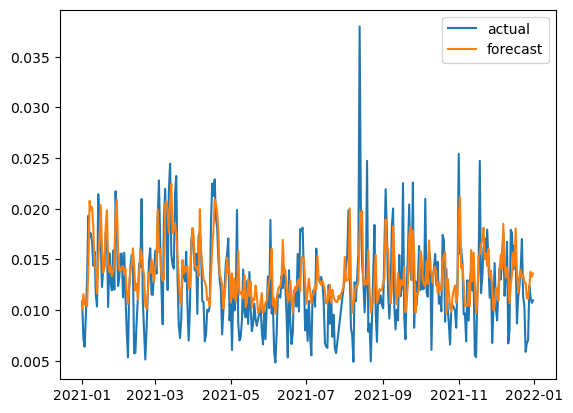

In [19]:
plt.plot(y_test_df, label='actual')
plt.plot(y_pred_df, label='forecast')
plt.legend()
plt.show()